<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Raymond Dávila  <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [24]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar el Dataset

In [25]:
#Código para cargar el Dataset
dsMedical = pd.read_csv('insurance.csv')
dsMedical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

dsMedical['sex_N'] = labelencoder.fit_transform(dsMedical['sex'])
dsMedical['smoker_N'] = labelencoder.fit_transform(dsMedical['smoker'])
dsMedical['region_N'] = labelencoder.fit_transform(dsMedical['region'])


In [27]:
dsMedical

,age,sex,bmi,children,smoker,region,charges,sex_N,smoker_N,region_N
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


## Descripción de la fuente del Dataset

El dataset de costo personal medico, se trata de un dataset para práctica de aprendizaje supervisado con regresión lineal. Al tratarse de un dataset de práctica este ya se encuentra limpio, por tanto, no es necesario aplicar ingeniería de características. El dataset cuenta con una variable objetivo que es el costo personal dependiendo de las diferentes variables independientes que serán expresadas en la parte inferior.

## Explique el problema a resolver. 
Se requiere predecir el precio de una propiedad basado en las variables antes mencionadas en la descripción, para la solución de ello se requiere usar regresión lineal para hallar una proximidad mas estimada a los precios reales.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

**Instancias**
El dataset consta de 7 variables donde la variable objetivo es el precio de la propiedad

**Atributos de entrada y significado**
>- age = Discreto, edad de la persona
>- sex = Categorico, sexo de la persona.
>- bmi = Continuo, indice de masa corporal.
>- children = Discreto, número de hijos.
>- smoker = Categorico booleano, es fumador o no es fumador
>- region = Categorico, de que region es la persona




<AxesSubplot:>

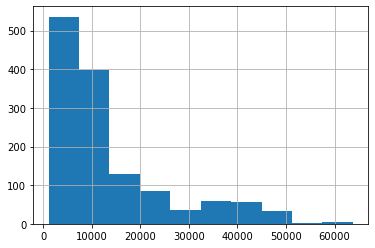

In [28]:
#Estadísticas de la variable objetivo
dsMedical['charges'].hist()

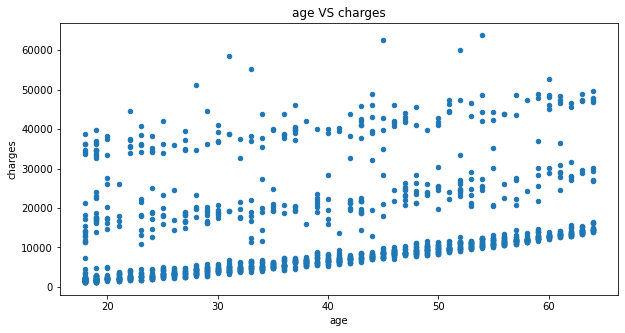

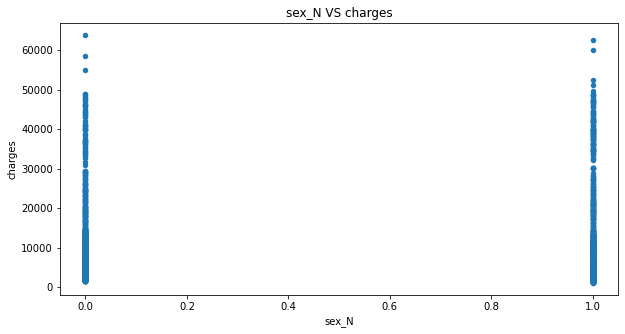

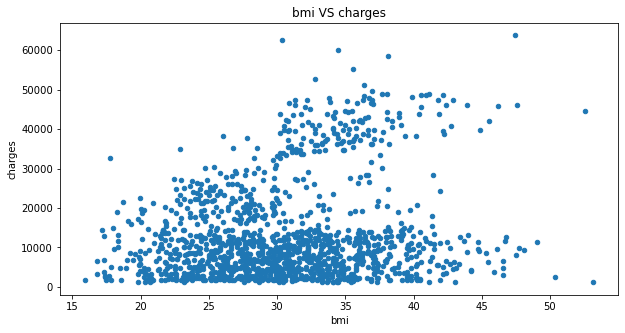

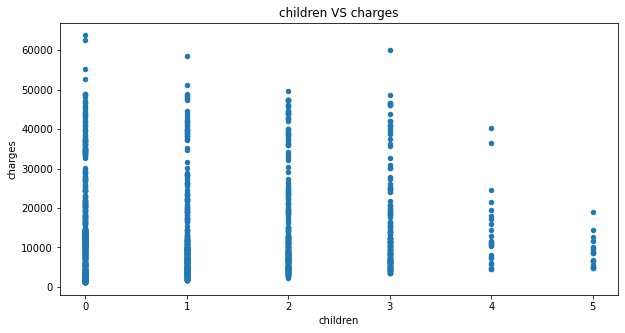

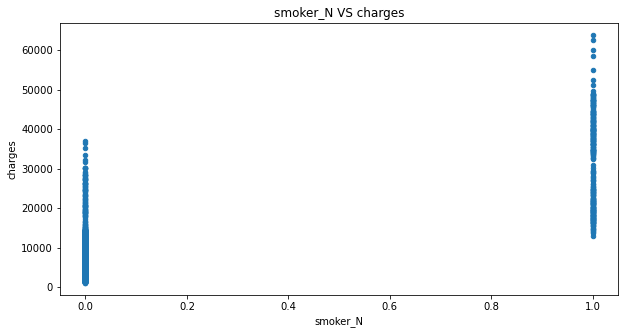

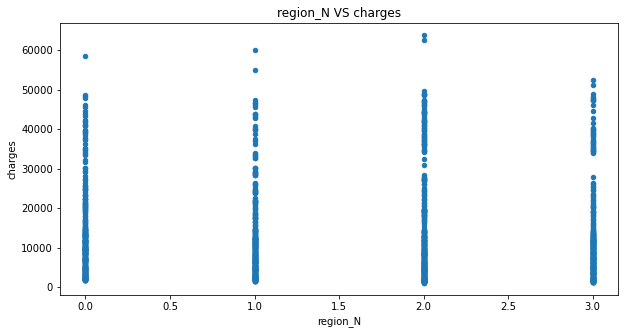

In [29]:
#Estadísticas de los antributos en relación con la variable objetivo
ContinuousCols=['age','sex_N','bmi','children','smoker_N','region_N']
for predictor in ContinuousCols:
    dsMedical.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

Por alguna razón para este dataset el número de hijos no es muy influyente al incremente de costo medicos por personas. A diferencia de la edad, pues, conforme va aumentando la edad aumenta el costo del mínimo. Las demás variables excepto el sexo y la región, si influyen activamente a que el costo médico cambie al final. 

## División del dataset en datos de entrenamiento y datos de test 

In [69]:
#Se asignan las columnas a dos variables que serán la variable objetivo y de entrada
VariableObjetivo=['charges']
VariablesEntrada=['age', 'sex_N', 'bmi', 'children', 'smoker_N', 'region_N']

#Se asignan las columnas a dos variables para generalizar
X=dsMedical[VariablesEntrada].values
y=dsMedical[VariableObjetivo].values

#Se importa la libreria que permita realizar la división del dataframe en train y test 
from sklearn.model_selection import train_test_split

#Se realiza la división del dataset 70% para train y 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X_train.shape, X_test.shape


((936, 6), (402, 6))

## Regresión Lineal

In [70]:
#Códo del modelo
Rlineal = LinearRegression()

In [71]:
#Entrenamiento
RL = Rlineal.fit(X_train,y_train)

In [72]:
#Test
RLP =RL.predict(X_test)
print(RLP)

[[ 2.02608979e+03]
 [ 1.20507841e+04]
 [ 1.04921330e+04]
 [ 2.49302173e+03]
 [ 8.31941250e+03]
 [ 1.14367049e+04]
 [ 3.48622203e+03]
 [ 1.35989419e+03]
 [ 1.19520218e+04]
 [ 9.67206698e+03]
 [ 1.14503622e+04]
 [ 5.35763549e+03]
 [ 2.95049938e+04]
 [-2.48372597e+02]
 [ 1.30521770e+04]
 [ 1.32515720e+04]
 [ 4.29597668e+03]
 [ 8.01020318e+03]
 [ 2.89698460e+04]
 [ 3.09798751e+03]
 [ 1.23535332e+04]
 [ 1.91619908e+03]
 [ 3.35553389e+04]
 [ 3.17588653e+04]
 [ 3.00973589e+04]
 [ 8.24819529e+03]
 [ 2.51477781e+03]
 [ 1.55847964e+04]
 [ 6.28365677e+03]
 [ 2.04819304e+03]
 [ 9.78710532e+03]
 [ 5.89204142e+03]
 [ 4.01084592e+03]
 [ 4.90345937e+03]
 [ 9.73944860e+03]
 [ 5.04646500e+03]
 [ 2.98042637e+04]
 [ 6.25834976e+03]
 [ 2.72304583e+04]
 [ 1.39780589e+04]
 [ 3.03013569e+02]
 [ 2.74321178e+04]
 [ 7.76323797e+03]
 [ 1.09412926e+03]
 [ 1.05663495e+04]
 [ 7.71047976e+03]
 [ 1.14876649e+04]
 [ 8.48749838e+03]
 [ 1.11697412e+04]
 [ 1.32506430e+04]
 [ 6.53137086e+03]
 [-1.28626709e+03]
 [ 2.5853051

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

In [73]:
#Se evalua el modelo usando una caracteristica llamada score ofrecida por la misma libreria de regresión lineal de sklearn
accuracy = RL.score(X_test, y_test)
print(accuracy)

0.7648415301644244
